In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "C:\\Users\\silviu\\OneDrive\\Desktop\\data_housing.csv"
df = pd.read_csv(path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

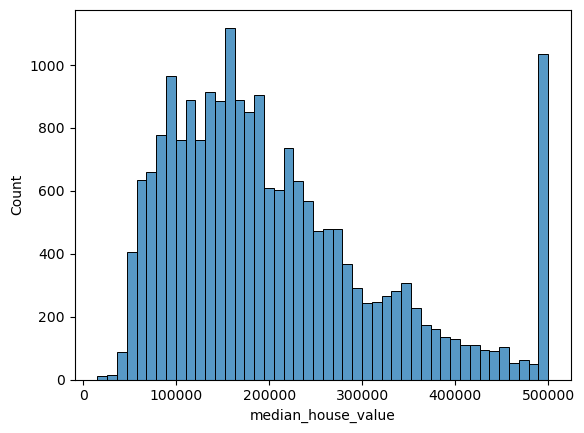

In [10]:
sns.histplot(df["median_house_value"][df['median_house_value']<1000000])


In [11]:
df = df[(df["ocean_proximity"]=='<1H OCEAN')|(df['ocean_proximity']=="INLAND")]

df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]



In [12]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [13]:
df.isnull().sum()
#total bedrooms

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [14]:
df['population'].median()

1195.0

In [16]:
#Shuffle the dataset
import random
idx = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [17]:
#Train_test_split
n= len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n_val,n_test,n_train

(3137, 3137, 9413)

In [18]:
df_train = df.iloc[idx[:n_train]]
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [19]:
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9235,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
11104,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
7428,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
19928,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
15534,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0
...,...,...,...,...,...,...,...,...,...
20033,36.07,-119.02,29.0,2610.0,597.0,1659.0,571.0,1.5911,60800.0
19766,40.03,-122.10,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0
6970,34.00,-118.04,30.0,5308.0,854.0,2114.0,838.0,5.1985,279200.0
6790,34.10,-118.15,36.0,3514.0,818.0,2277.0,828.0,3.1211,229300.0


In [20]:
df_test = df.iloc[idx[n_train+n_val:]]
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11959,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1257,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
18438,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
15069,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
16227,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [21]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [23]:
#target_values
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [24]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [26]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

def rmse(y_pred,y):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [42]:
def prepare_X(df,m_value):
    df = df.copy()
    df = df.fillna(m_value)
    X = df.values
    return X

#Filling with 0
X_train = prepare_X(df_train,0)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val,m_value = 0)

y_pred = w0 + X_val.dot(w)

round(rmse(y_pred,y_val),2)


0.34

In [41]:
#Filling with mean
mean_value = df_train["total_bedrooms"].mean()
X_train = prepare_X(df_train,mean_value)
wo,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val,mean_value)
y_pred = w0 + X_val.dot(w)
round(rmse(y_pred,y_val),2)


0.34

In [46]:
#Regularized linear regression

r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

for r in r_list:
    X_train = prepare_X(df_train,0)
    w0,w = train_linear_regression(X_train,y_train,r)
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_pred,y_val),2)
    print(r,score)
    
#smallest r 0.000001

0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


In [51]:
scores = []
for s in range(10):
    np.random.seed(s)
    np.random.shuffle(idx)
    
    #Split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    

    
    #target_values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    #Training models
    X_train = prepare_X(df_train,0)
    w0,w = train_linear_regression(X_train,y_train)
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    scores.append(round(rmse(y_pred,y_val),3))
scores
    

[0.34, 0.343, 0.339, 0.34, 0.334, 0.337, 0.326, 0.337, 0.335, 0.345]

In [53]:
arr = np.array(scores)
round(arr.std(),3)

0.005

In [98]:
def train_linear_regression(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
n = len(df)

# shuffled data
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

#20/20/60
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

#Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
    

    
#target_values
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
    
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train_full = pd.concat([df_train,df_val])
df_train_full = df_train_full.reset_index(drop=True)

X_train_full = prepare_X(df_train_full,0)
y_train_full = np.concatenate([y_train,y_val])
w0,w = train_linear_regression_reg(X_train_full,y_train_full,r=0.001)

X_test = prepare_X(df_test, m_value=0)
y_pred = w0 + X_test.dot(w)

rmse(y_pred,y_test)

0.33498993366064994